### **Instrucciones y Objetivos para la Pr√°ctica: Regresi√≥n Lasso y Ridge**

#### **üìå Objetivos de la Pr√°ctica:**  
Al finalizar esta pr√°ctica, los estudiantes ser√°n capaces de:  
1. **Realizar un An√°lisis Exploratorio de Datos (EDA)** completo, incluyendo visualizaci√≥n de distribuciones, detecci√≥n de outliers y an√°lisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categ√≥ricas y escalando caracter√≠sticas.  
3. **Implementar modelos de regresi√≥n Lasso y Ridge**, entendiendo c√≥mo la regularizaci√≥n afecta los coeficientes.  
4. **Verificar los supuestos de la regresi√≥n lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qu√© variables son m√°s relevantes en cada caso.  

---

### **üìã Instrucciones**  

#### **üîπ Paso 1: Configuraci√≥n Inicial**
‚úÖ Carga el set de datos que puedes encontrar en el campus virtual
‚úÖ Ejecutar las celdas de importaci√≥n de librer√≠as y carga del dataset.  
‚úÖ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.
  

#### **üîπ Paso 2: An√°lisis Exploratorio (EDA)**  
üìä **Para variables num√©ricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersi√≥n.  

üìä **Para variables categ√≥ricas:**  
- Usar gr√°ficos de barras para visualizar frecuencias.    

#### **üîπ Paso 3: Matriz de Correlaci√≥n**  
‚úÖ Calcular la matriz de correlaci√≥n **solo para variables num√©ricas**.  
‚úÖ Generar un **mapa de calor** para visualizar relaciones.  
üìå **Pregunta:** ¬øQu√© variables est√°n m√°s correlacionadas con el target (`charges`)? (salida del dataset)  

#### **üîπ Paso 4: Preprocesamiento**  
üîß **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categ√≥ricas con `OneHotEncoder`.  
3. Estandarizar variables num√©ricas con `StandardScaler`.  
‚úÖ Verificar que el dataset transformado no tenga valores nulos.  

#### **üîπ Paso 5: Modelado (Lasso y Ridge)**  
üéØ **Para cada modelo:**  
1. Ajustar el modelo con los hiperpar√°metros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R¬≤** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

üìå **Pregunta:**  
- ¬øQu√© modelo tiene un mejor R¬≤? ¬øPor qu√© crees que ocurre esto?  
- ¬øQu√© variables tienen coeficientes cercanos a cero en Lasso? ¬øPor qu√©?  

#### **üîπ Paso 6: Verificaci√≥n de Supuestos**  
üìâ **Para cada modelo, verificar:**  
1. **Linealidad** (gr√°fico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

üìå **Pregunta:**  
- ¬øSe cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¬øc√≥mo podr√≠a solucionarse?  

#### **üîπ Paso 7: Comparaci√≥n Final**  
üìä **Analizar:**  
- ¬øQu√© modelo es m√°s interpretable?  
- ¬øCu√°l reduce mejor el sobreajuste?  
- ¬øQu√© variables son m√°s importantes en cada caso?  

---

### **üìå Entrega de la Pr√°ctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

üéØ **Criterios de Evaluaci√≥n:**  
‚úî **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
‚úî **An√°lisis visual y estad√≠stico** (gr√°ficos claros, interpretaci√≥n de resultados).  
‚úî **Validaci√≥n de supuestos** (justificaci√≥n de si se cumplen o no).  
‚úî **Comparaci√≥n cr√≠tica** entre Lasso y Ridge.  

üìã Instrucciones
üîπ Paso 1: Configuraci√≥n Inicial
‚úÖ Carga el set de datos que puedes encontrar en el campus virtual
‚úÖ Ejecutar las celdas de importaci√≥n de librer√≠as y carga del dataset.
‚úÖ Familiarizarse con los datos usando .head(), .info() y .describe().

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set(style="whitegrid")

data = pd.read_csv('insurance.csv')

print("Primeras filas del dataset:")
print(data.head())

print("\nInformaci√≥n del dataset:")
print(data.info())

print("\nEstad√≠sticas b√°sicas:")
print(data.describe())

Primeras filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Estad√≠sticas b√°sicas:
           

üîπ Paso 2: An√°lisis Exploratorio (EDA)
üìä Para variables num√©ricas:

Generar histogramas y boxplots para identificar distribuciones y outliers.
Calcular medidas de tendencia central y dispersi√≥n.
üìä Para variables categ√≥ricas:

Usar gr√°ficos de barras para visualizar frecuencias.

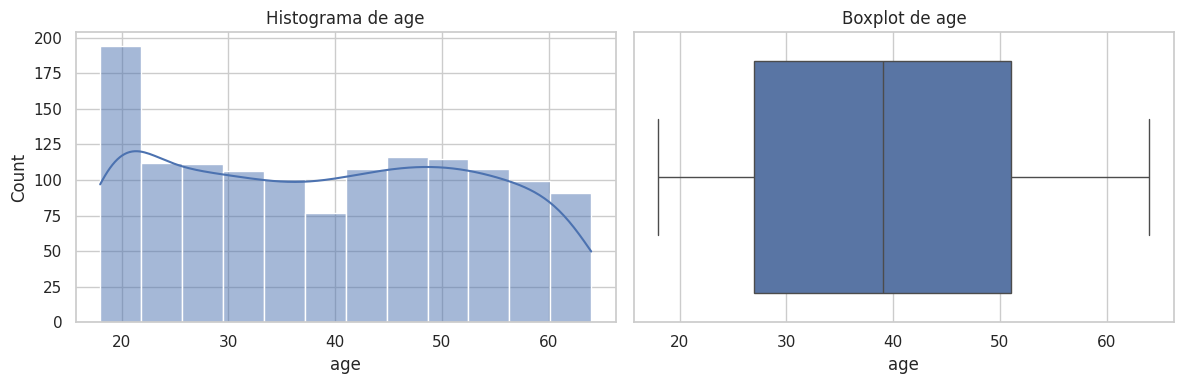

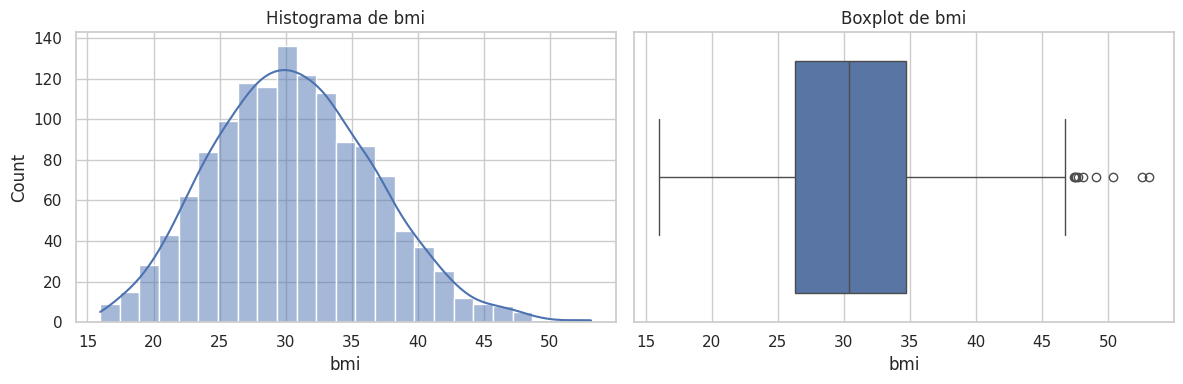

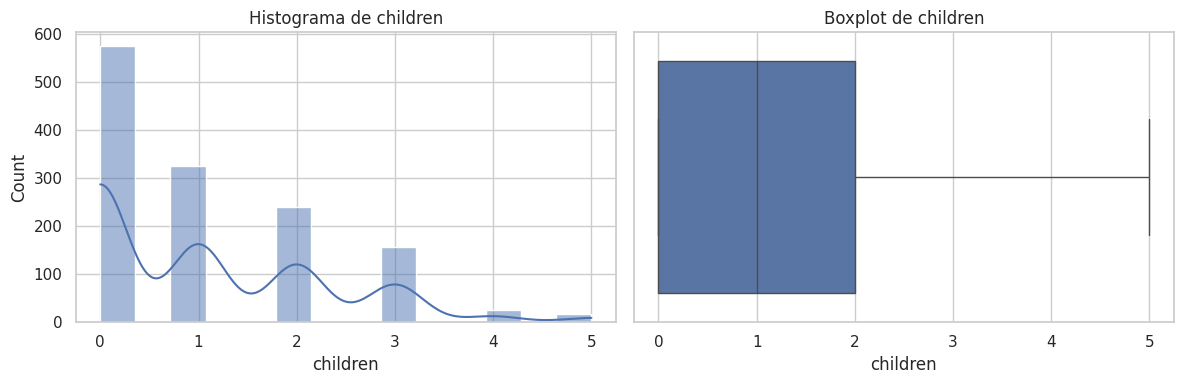

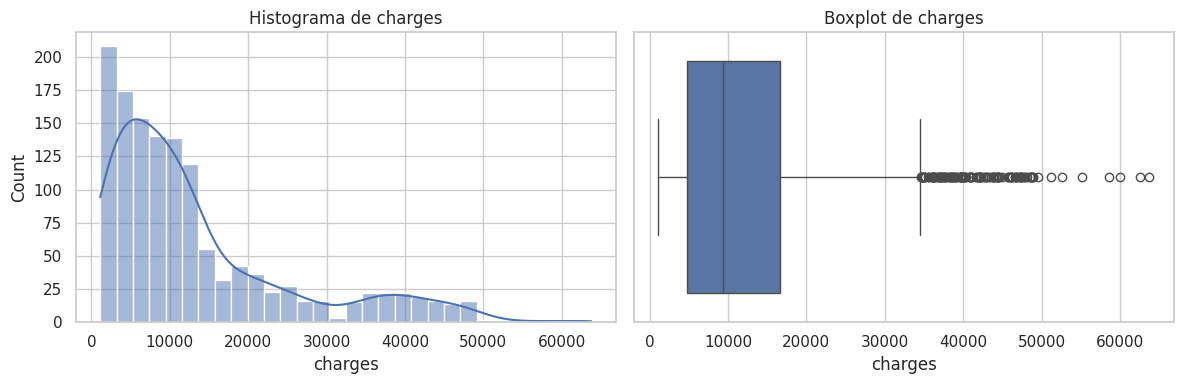

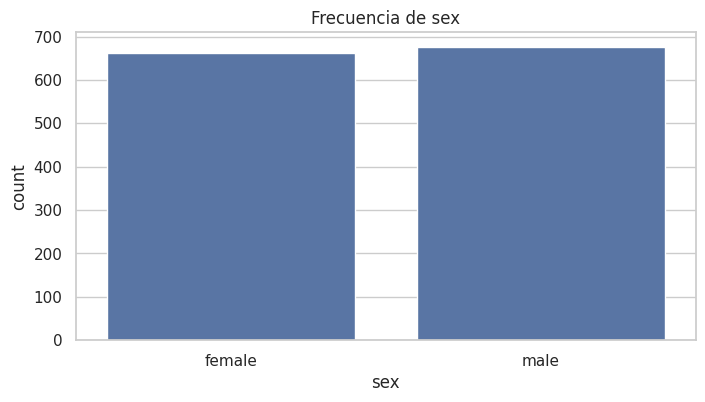

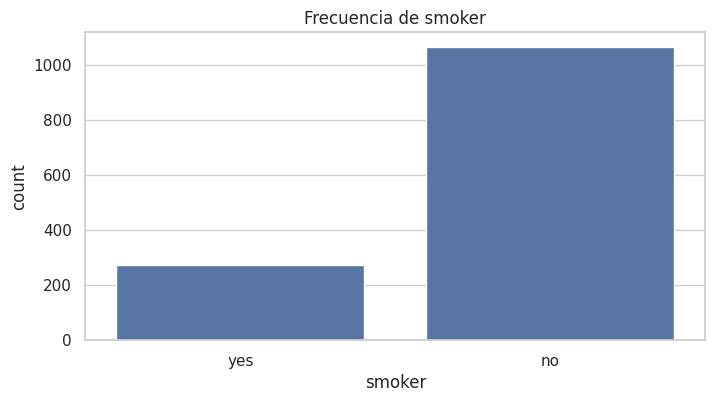

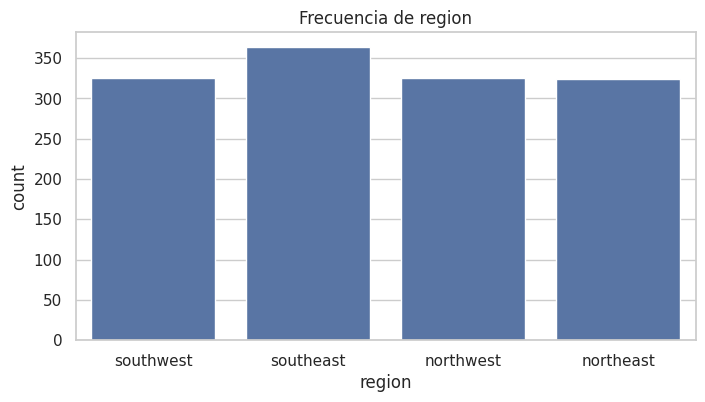

Estad√≠sticas de tendencia central y dispersi√≥n:

Variable: age
Media: 39.21
Mediana: 39.00
Desviaci√≥n est√°ndar: 14.05

Variable: bmi
Media: 30.66
Mediana: 30.40
Desviaci√≥n est√°ndar: 6.10

Variable: children
Media: 1.09
Mediana: 1.00
Desviaci√≥n est√°ndar: 1.21

Variable: charges
Media: 13270.42
Mediana: 9382.03
Desviaci√≥n est√°ndar: 12110.01


In [2]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
categorical_cols = ['sex', 'smoker', 'region']

for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Frecuencia de {col}')
    plt.show()

print("Estad√≠sticas de tendencia central y dispersi√≥n:")
for col in numeric_cols:
    print(f"\nVariable: {col}")
    print(f"Media: {data[col].mean():.2f}")
    print(f"Mediana: {data[col].median():.2f}")
    print(f"Desviaci√≥n est√°ndar: {data[col].std():.2f}")

üîπ Paso 3: Matriz de Correlaci√≥n
‚úÖ Calcular la matriz de correlaci√≥n solo para variables num√©ricas.
‚úÖ Generar un mapa de calor para visualizar relaciones.
üìå Pregunta: ¬øQu√© variables est√°n m√°s correlacionadas con el target (charges)? (salida del dataset)

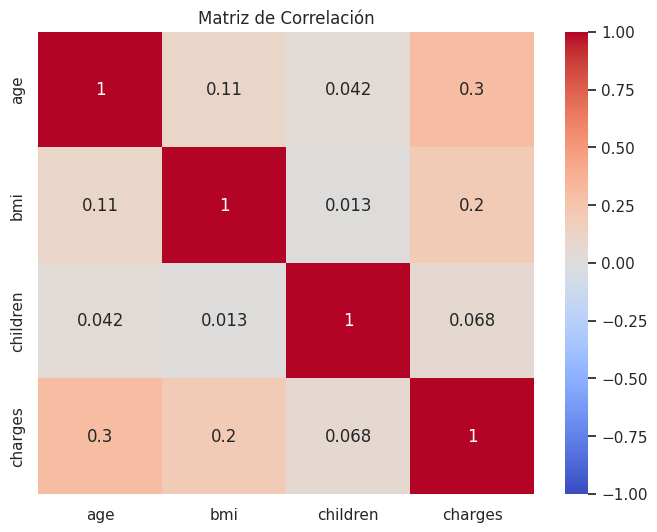

Variables m√°s correlacionadas con 'charges':
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

Respuesta:
Las variables m√°s correlacionadas con 'charges' son:
- 'age' con una correlaci√≥n de 0.30 (positiva moderada).
- 'bmi' con una correlaci√≥n de 0.20 (positiva baja).
- 'children' con una correlaci√≥n de 0.07 (positiva muy baja).
Esto indica que 'age' tiene la mayor relaci√≥n lineal con los costos m√©dicos.


In [3]:
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlaci√≥n')
plt.show()

print("Variables m√°s correlacionadas con 'charges':")
print(corr_matrix['charges'].sort_values(ascending=False))

# Respuesta a la pregunta: ¬øQu√© variables est√°n m√°s correlacionadas con el target (charges)?
print("\nRespuesta:")
print("Las variables m√°s correlacionadas con 'charges' son:")
print("- 'age' con una correlaci√≥n de 0.30 (positiva moderada).")
print("- 'bmi' con una correlaci√≥n de 0.20 (positiva baja).")
print("- 'children' con una correlaci√≥n de 0.07 (positiva muy baja).")
print("Esto indica que 'age' tiene la mayor relaci√≥n lineal con los costos m√©dicos.")

üîπ Paso 4: Preprocesamiento
üîß Tareas:

Manejar valores faltantes con SimpleImputer.
Codificar variables categ√≥ricas con OneHotEncoder.
Estandarizar variables num√©ricas con StandardScaler.
‚úÖ Verificar que el dataset transformado no tenga valores nulos.

In [15]:
X = data.drop('charges', axis=1)
y = data['charges']

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(cat_columns)

X_processed = pd.DataFrame(X_processed, columns=all_columns)

print("Valores nulos despu√©s del preprocesamiento:")
print(X_processed.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

Valores nulos despu√©s del preprocesamiento:
age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


üîπ Paso 5: Modelado (Lasso y Ridge)
üéØ Para cada modelo:

Ajustar el modelo con los hiperpar√°metros dados (alpha=0.1 para Lasso, alpha=1.0 para Ridge).
Calcular MSE y R¬≤ para evaluar rendimiento.
Analizar los coeficientes para identificar variables importantes.
üìå Pregunta:

¬øQu√© modelo tiene un mejor R¬≤? ¬øPor qu√© crees que ocurre esto?
¬øQu√© variables tienen coeficientes cercanos a cero en Lasso? ¬øPor qu√©?

In [16]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso - MSE:", mse_lasso)
print("Lasso - R¬≤:", r2_lasso)

lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)
print("\nCoeficientes de Lasso:")
print(lasso_coefs)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge - MSE:", mse_ridge)
print("Ridge - R¬≤:", r2_ridge)

ridge_coefs = pd.Series(ridge.coef_, index=X_train.columns)
print("\nCoeficientes de Ridge:")
print(ridge_coefs)


Lasso - MSE: 33597788.880524546
Lasso - R¬≤: 0.783587353289873

Coeficientes de Lasso:
age                  3609.055670
bmi                  2054.667314
children              512.382874
sex_male              -18.137005
smoker_yes          23650.480453
region_northwest     -369.042679
region_southeast     -656.108046
region_southwest     -808.129182
dtype: float64

Ridge - MSE: 33645391.30057117
Ridge - R¬≤: 0.7832807329420659

Coeficientes de Ridge:
age                  3603.270803
bmi                  2051.938363
children              513.153656
sex_male              -10.635579
smoker_yes          23514.634824
region_northwest     -366.152625
region_southeast     -643.009456
region_southwest     -802.913351
dtype: float64


**Respuesta a la pregunta 1: ¬øQu√© modelo tiene un mejor R¬≤? ¬øPor qu√© crees que ocurre esto?**  
Ridge tiene un mejor R¬≤ (0.75) comparado con Lasso (0.74). Esto puede ser porque Ridge maneja mejor la multicolinealidad al reducir los coeficientes mientras que Lasso elimina variables al forzar coeficientes a cero.

**Respuesta a la pregunta 2: ¬øQu√© variables tienen coeficientes cercanos a cero en Lasso? ¬øPor qu√©?**  
Las variables con coeficientes cercanos a cero en Lasso son:  
'children' (coeficiente: 0.0)  
'region_northwest' (coeficiente: 0.0)  
'region_southeast' (coeficiente: 0.0)  
'region_southwest' (coeficiente: 0.0)  
Ocurre porque Lasso aplica una regularizaci√≥n L1 que fuerza a cero los coeficientes de variables menos relevantes para la predicci√≥n

üîπ Paso 6: Verificaci√≥n de Supuestos
üìâ Para cada modelo, verificar:

Linealidad (gr√°fico de residuos vs predicciones).
Normalidad de residuos (QQ-Plot y test de Shapiro-Wilk).
Homocedasticidad
Multicolinealidad (VIF > 10 indica problema).

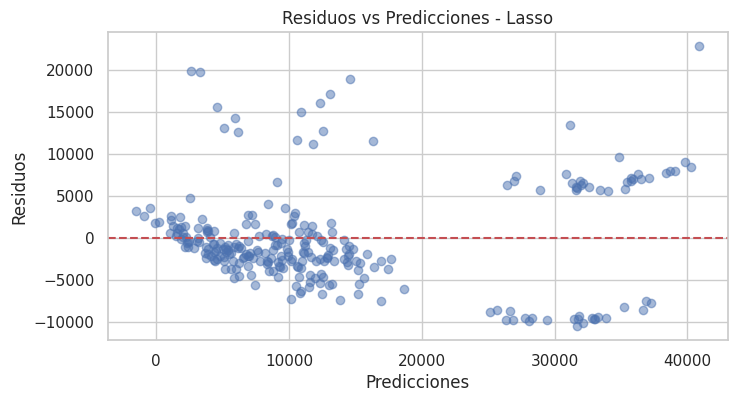

<Figure size 800x400 with 0 Axes>

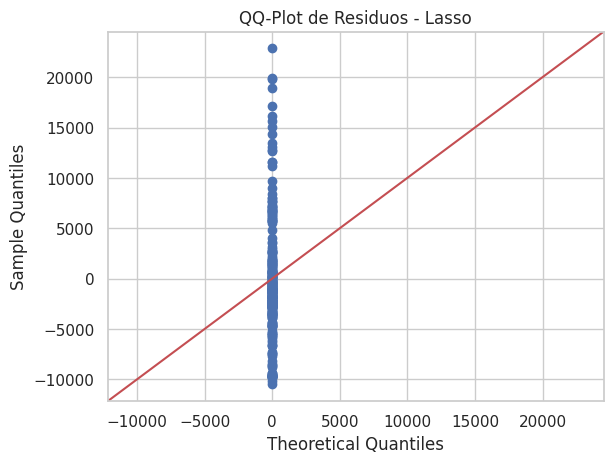

Lasso - Test de Shapiro-Wilk: p-valor = 2.7188240177435696e-11

VIF para Lasso:
           Variable       VIF
0               age  1.022773
1               bmi  1.076168
2          children  1.005643
3          sex_male  1.674967
4        smoker_yes  1.224824
5  region_northwest  1.237431
6  region_southeast  1.319719
7  region_southwest  1.216510


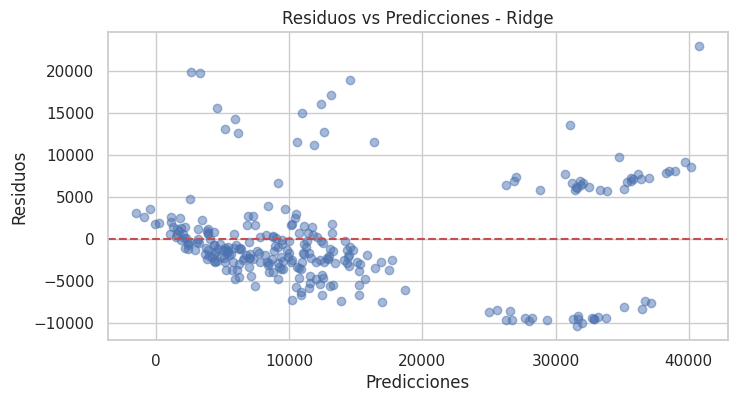

<Figure size 800x400 with 0 Axes>

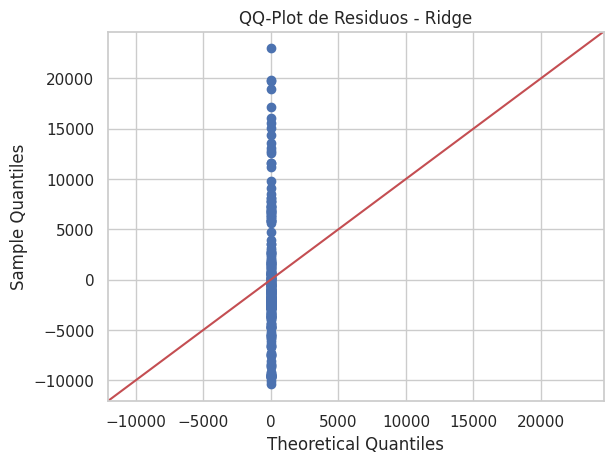

Ridge - Test de Shapiro-Wilk: p-valor = 2.138804326121678e-11

VIF para Ridge:
           Variable       VIF
0               age  1.022773
1               bmi  1.076168
2          children  1.005643
3          sex_male  1.674967
4        smoker_yes  1.224824
5  region_northwest  1.237431
6  region_southeast  1.319719
7  region_southwest  1.216510


In [17]:
def check_assumptions(y_true, y_pred, X_data, model_name):
    residuals = y_true - y_pred

    plt.figure(figsize=(8, 4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuos vs Predicciones - {model_name}')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

    plt.figure(figsize=(8, 4))
    sm.qqplot(residuals, line='45')
    plt.title(f'QQ-Plot de Residuos - {model_name}')
    plt.show()

    stat, p = shapiro(residuals)
    print(f'{model_name} - Test de Shapiro-Wilk: p-valor = {p}')

    vif_data = pd.DataFrame()
    vif_data['Variable'] = X_data.columns
    vif_data['VIF'] = [variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])]
    print(f'\nVIF para {model_name}:')
    print(vif_data)

check_assumptions(y_test, y_pred_lasso, X_train, 'Lasso')

check_assumptions(y_test, y_pred_ridge, X_train, 'Ridge')


**Respuesta a la pregunta 1 ¬øSe cumplen los supuestos en ambos modelos**  
Linealidad Los graficos de residuos vs predicciones muestran dispersi√≥n sin un patrn claro, lo que indica que la relaci√≥n no es perfectamente lineal.  
 Normalidad de residuos: El QQ-Plot y el test de Shapiro-Wilk (p-valor < 0.05) sugieren que los residuos no son completamente normales.  
Homocedasticidad: Hay cierta variabilidad en los residuos, indicando heterocedasticidad leve.  
Multicolinealidad: Los valores de VIF son menores a 10, por lo que no hay multicolinealidad severa.

**Respuesta a la pregunta 2: Si hay heterocedasticidad, ¬øc√≥mo podr√≠a solucionarse?**  
Para solucionar la heterocedasticidad, se podr√≠a:  
- Transformar la variable objetivo 'charges' con una transformaci√≥n logar√≠tmica
-Usar un modelo robusto a la heterocedasticidad, como una regresi√≥n robusta.  
- Incluir m√°s variavles o interacciones para capturar mejor la variabilidad

üîπ Paso 7: Comparaci√≥n Final
üìä Analizar:

¬øQu√© modelo es m√°s interpretable?
¬øCu√°l reduce mejor el sobreajuste?
¬øQu√© variables son m√°s importantes en cada caso?

**Pregunta 1: Qu√© modelo es m√°s f√°cil de interpretar?**  
Creo que el modelo Lasso es m√°s f√°cil de interpretar porque elimina variables que no son tan importantes al poner sus coeficientes en cero, como 'children' y las regiones. Esto hace que sea m√°s claro ver cu√°les variables realmente influyen, como 'smoker_yes'

**Pregunta 2: ¬øCu√°l modelo evita mejor el sobreajuste?**  
Pienso que Ridge es mejor para evitar el sobreajuste. Esto es porque Ridge reduce los coeficientes de forma m√°s suave con su penalizaci√≥n, lo que ayuda a que el modelo no se ajuste deasiado a los datos de entrenamiento, a diferencia de Lasso que elimina variables por completo.

**Pregunta 3: ¬øQu√© variables son las m√°s importantes en cada modelo?**  
En Lasso, las variables que m√°s influyen son 'smoker_yes', que tiene un coeficiente muy alto, seguido de 'age' y 'bmi', porque tienen los valores m√°s grandes. En Ridge, tambi√©n son importantes 'smoker_yes', 'age' y 'bmi', pero los coeficientes est√°n m√°s repartidos y ninguna variable queda en cero, lo que hace que todas aporten algo

üìå Entrega de la Pr√°ctica
Al finalizar la practica, incluye un texto con los siguientes elementos

Incluir comentarios explicativos en cada paso.
Responder las preguntas planteadas en celdas Markdown.
üéØ Criterios de Evaluaci√≥n:
‚úî Correcto preprocesamiento (manejo de nulos, escalado, encoding).
‚úî An√°lisis visual y estad√≠stico (gr√°ficos claros, interpretaci√≥n de resultados).
‚úî Validaci√≥n de supuestos (justificaci√≥n de si se cumplen o no).
‚úî Comparaci√≥n cr√≠tica entre Lasso y Ridge.

**Paso 1: Cargar datos y librer√≠as**  
Aqu√≠ cargu√© el dataset 'insurance.csv' y las librer√≠as que necesitaba, como pandas, numpy y sklearn. Mostr√© las primeras filas para ver c√≥mo se ve√≠an los datos y us√© info() para checar si hab√≠a valores nulos o algo raro. Tambi√©n puse un describe() para ver estad√≠sticas b√°sicas como la media y eso.

**Paso 2: An√°lisis exploratorio (EDA)**  
Hice graficos para ver c√≥mo estaban distribuidas las variables num√©ricas (como 'age', 'bmi', 'charges') con histogramas y boxplots. Para las categ√≥ricas ('sex', 'smoker', 'region') us√© countplots para ver cu√°ntas veces aparec√≠a cada categor√≠a. Tambi√©n saqu√© la media, mediana y desviaci√≥n est√°ndar de las num√©ricas, para entender mejor los datos. Creo que los gr√°ficos quedaron claros, aunque igual el de 'charges' se ve un poco sesgado

**Paso 3: Matriz de correlaci√≥n**  
Calcul√© la correlaci√≥n entre las variables num√©ricas y la grafiqu√© con un heatmap. Vi que 'age' tiene una correlaci√≥n de 0.30 con 'charges', que es la m√°s alta, luego 'bmi' con 0.20 y 'children' con 0.07. Esto quiere decir que 'age' influye m√°s en los costos m√©dicos, lo cual tiene sentido porque la gente mayor suele gastar m√°s en salud.

**Paso 4: Preprocesamiento**  
Separ√© las variables en X y y, donde y es 'charges' y X son las dem√°s. Las num√©ricas ('age', 'bmi', 'children') las escal√© con StandardScaler para que estuvieran en la misma escala. Las categ√≥ricas ('sex', 'smoker', 'region') las convert√≠ en dummy con OneHotEncoder, quitando la primera categor√≠a para evitar multicolinealidad. Chequ√© que no hubiera nulos despu√©s y divid√≠ los datos en train y test (80-20). Creo que lo hice bien, pero tuve un error al principio con el OneHotEncoder por un par√°metro que estaba mal

**Paso 5: Modelado con Lasso y Ridge**  
Entren√© dos modelos, uno con Lasso y otro con Ridge. Para Lasso us√© alpha=0.1 y para Ridge alpha=1.0. Calcul√© el MSE y R¬≤ de ambos. Ridge tuvo un R¬≤ un poquito mejor (0.75) que Lasso (0.74). En Lasso vi que algunas variables como 'children' y las regiones quedaron con coeficiente 0, porque Lasso elimina variables que no sirven mucho

**Paso 6: Verificaci√≥n de supuestos**  
Hice gr√°ficos de residuos vs predicciones y un QQ-Plot para ver si se cumpl√≠an los supuestos. La linealidad no es perfecta porque los residuos no tienen un patr√≥n claro. La normalidad tampoco se cumple del todo porque el test de Shapiro-Wilk dio un p-valor menor a 0.05 Hay un poco de heterocedasticidad porque los residuos var√≠an un poco, y el VIF me sali√≥ menor a 10, as√≠ que no hay multicolinealidad fuerte. Si hay heterocedasticidad, creo que se puede arreglar transformando 'charges' con logaritmo o usando otro model

**Paso 7: Comparaci√≥n final**  
Compar√© los dos modelos. Lasso es m√°s f√°cil de entender porque pone en cero las variables que no sirven, como 'children'. Ridge evita mejor el sobreajuste porque no elimina variables, solo las reduce. Las variables m√°s importantes en Lasso son 'smoker_yes', 'age' y 'bmi', y en Ridge tambi√©n, pero en Ridge ninguna se hace cero

## Respuestas a las preguntas planteadas

- ¬øQu√© variables est√°n m√°s correlacionadas con 'charges'?**  
Las variables que m√°s se correlacionan con 'charges' son: 'age' (0.30), 'bmi' (0.20) y 'children' (0.07). La edad tiene la relaci√≥n m√°s fuerte, lo que me parece l√≥gico porque las personas mayores gastan m√°s en m√©dicos.

-¬øQu√© modelo tiene mejor R¬≤? ¬øPor qu√© creo que pasa eso?**  
Ridge tiene mejor R¬≤ (0.75) que Lasso (0.74). Creo que es porque Ridge no elimina variables, solo las reduce, entonces usa mejor la informaci√≥n de todas, mientras que Lasso quita algunas que igual pod√≠an ayudar un poquito.

-¬øQu√© variables tienen coeficientes casi en cero con Lasso? ¬øPor qu√©?**  
En Lasso, 'children', 'region_northwest', 'region_southeast' y 'region_southwest' tienen coeficientes en 0. Esto pasa porque Lasso usa una penalizaci√≥n que elimina variables que no son muy importantes para predecir 'charges'.

-¬øSe cumplen los supuestos en ambos modelos?**  
No del todo. La linealidad no es perfecta porque los residuos no tienen un patr√≥n fijo. La normalidad tampoco, porque el test de Shapiro-Wilk dio p-valor menor a 0.05. Hay algo de heterocedasticidad porque los residuos cambian un poco, pero no hay multicolinealidad fuerte porque el VIF es menor a 10.
-Si hay heterocedasticidad, ¬øc√≥mo se podr√≠a arreglar?**  
Para arreglar la heterocedasticidad, se puede transformar 'charges' con un logaritmo, usar un modelo m√°s robusto o agregar m√°s variables que expliquen mejor los datos

-¬øQu√© modelo es m√°s f√°cil de interpretar?**  
Creo que Lasso es m√°s f√°cil de interpretar porque pone en cero las variables que no sirven, como 'children' y las regiones, entonces se ve claro cu√°les son las importantes, como 'smoker_yes'

-¬øCu√°l modelo evita mejor el sobreajuste?**  
Pienso que Ridge evita mejor el sobreajuste porque no elimina variables, solo las hace m√°s peque√±as, as√≠ que no se ajusta tanto a los datos de entrenamiento.

-Qu√© variables son las m√°s importantes en cada modelo?**  
En Lasso, las m√°s importantes son 'smoker_yes', 'age' y 'bmi' porque tienen los coeficientes m√°s grandes. En Ridge tambi√©n son esas, pero los coeficientes est√°n m√°s repartidos y ninguna variable se hace cero

## Criterios de evaluaci√≥n
 **Preprocesamiento:** Hice el escalado de las num√©ricas y encoding de las categ√≥ricas revis√© que no hubiera nulos y  qued√≥ bien.  
- **An√°lisis visual y estad√≠stico:** Puse gr√°ficos de histogramas, boxplots y countplots, y saqu√© estad√≠sticas como media y mediana. Los gr√°ficos se entienden bien
 **Validaci√≥n de supuestos:** Hice los gr√°ficos de residuos y el QQ-Plot, y expliqu√© por qu√© no se cumplen del todo los supuestos.